# Tutorial 1: Using Gridded Vessel Emissions Datasets in the Ocean Data Connector

The gridded vessel emissions and traffic dataset is based on AIS data and CO2 emissions estimates of more than 350 000 vessels from 2020. The data is aggreagated into grids on a monthly basis, and the aggregations are split into vessel categories. 

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
def plot_emissions(_ds,cmap='inferno'):
    p = _ds.plot.pcolormesh(
        transform=ccrs.PlateCarree(),
        cmap=plt.get_cmap(cmap),
        vmax=_ds.quantile(0.97),
        subplot_kws={'projection': ccrs.Mercator()}
    )
    ax = p.axes
    ax.figure.set_size_inches(24,12)
    ax.coastlines(color='white')

In [1]:
#import odp.geospatial as odp
import xarray as xa
from hackathon_utils import get_zarr_from_blob

import os


In [3]:

# Connection string to blob storage has to be set if being run outside the Ocean Data Connector
#os.environ['HACKATHON_CONNECTION_STR']="xxxxxxxxxx"

try: 
    os.environ['HACKATHON_CONNECTION_STR']
except:
    print('HACKATHON_CONNECTION_STR must be set to access data')
    

## Opening the "Vessel CO2 Emissions and Traffic" dataset

In [3]:
store_list=get_zarr_from_blob('zarr/vessel_emissions_and_traffic')
ds = xa.open_mfdataset(store_list, parallel=True, engine="zarr")
ds

,Array,Chunk
Bytes,6.79 GiB,7.63 MiB
Shape,"(28, 3972, 8194)","(1, 1000, 1000)"
Count,1009 Tasks,1008 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,6.79 GiB,7.63 MiB
Shape,"(28, 3972, 8194)","(1, 1000, 1000)"
Count,1009 Tasks,1008 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


## Hours of traffic from fishing vessels in the North Sea

In [4]:
lon0,lat0,lon1,lat1=-13.33779952,50.22380672,9.75926460,63.38491144 # bounding box
ds_fishing_north_sea=ds.sel(lon=slice(lon0,lon1),
           lat=slice(lat0,lat1),
           time=slice('2020-01-01',
                      '2022-01-01')).hours_fishing.compute()

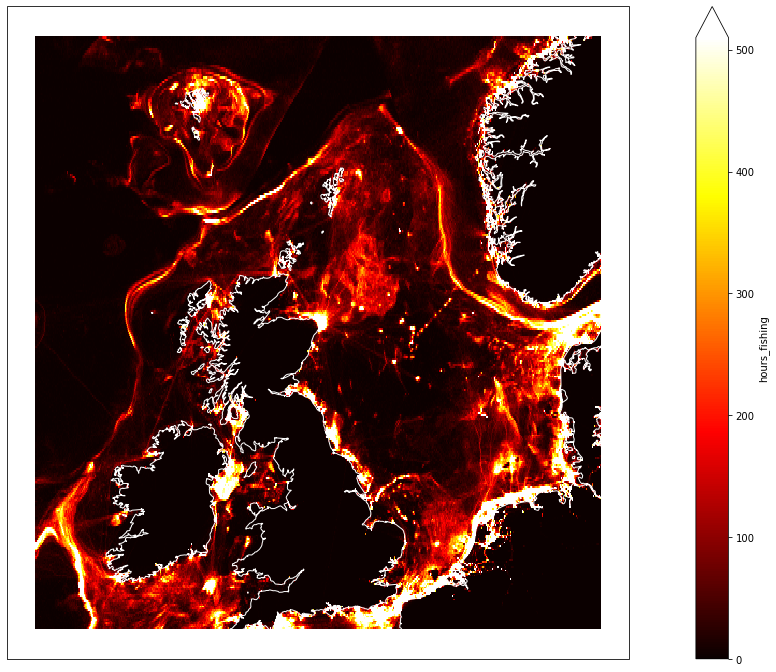

In [5]:
plot_emissions(ds_fishing_north_sea.sum('time'),cmap='hot')

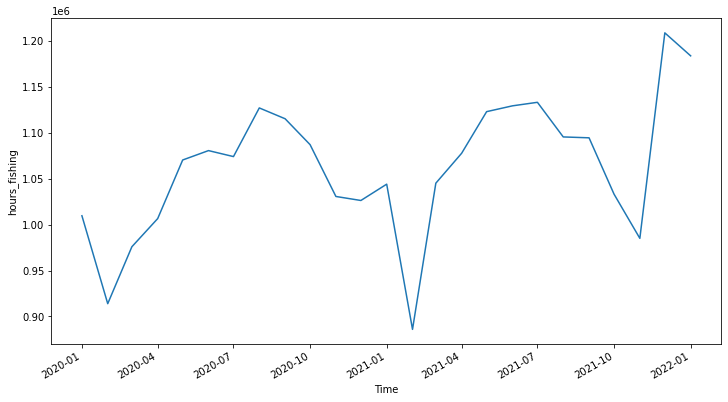

In [6]:
ds_fishing_north_sea.sum(['lon','lat']).plot(figsize=(12,6))

## CO2 Emissions from passenger vessels in Europe

In [7]:
lon0,lat0,lon1,lat1=-12.67959207,30.20434251,37.05813440,62.46601195 # bounding box
ds_passenger_europe=ds.sel(lon=slice(lon0,lon1),
           lat=slice(lat0,lat1),
           time=slice('2020-01-01',
                      '2022-01-01')).co2_passenger.compute()

In [8]:
print(f"Total CO2 emissions from passenger vessels in selected area and time period estimated to "
      f"{(ds_passenger_europe.sum(['lon','lat','time']).data/1e6):.1f} mT")

Total CO2 emissions from passenger vessels in selected area and time period estimated to 73235959.6 mT


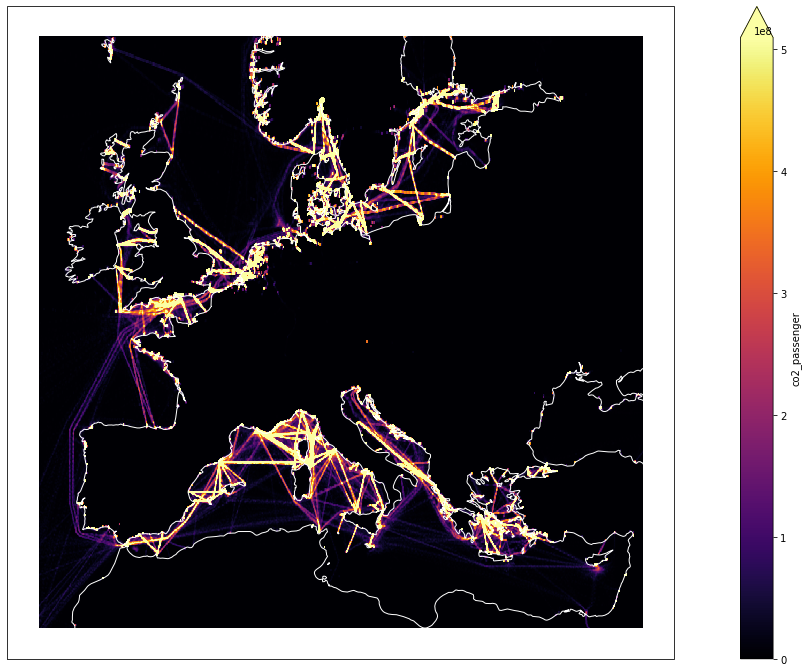

In [9]:
plot_emissions(ds_passenger_europe.sum('time').rolling(lat=3,lon=3).mean(),cmap='inferno')

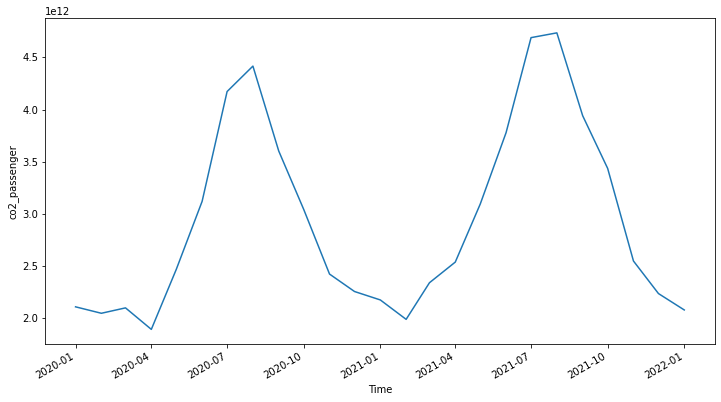

In [10]:
ds_passenger_europe.sum(['lon','lat']).plot(figsize=(12,6))

## CO2 Emissions from cargo vessels in South East Asia

In [11]:
lon0,lat0,lon1,lat1=81.39273367,-25.20783174,147.93180418,44.22364785
ds_cargo_se_asia=ds.sel(lon=slice(lon0,lon1),
           lat=slice(lat0,lat1),
           time=slice('2020-01-01',
                      '2022-01-01')).co2_cargo.compute()

In [12]:
print(f"Total CO2 emissions from passenger vessels in selected area and time period estimated to "
      f"{(ds_cargo_se_asia.sum(['lon','lat','time']).data/1e6):.1f} mT")

Total CO2 emissions from passenger vessels in selected area and time period estimated to 424008493.8 mT


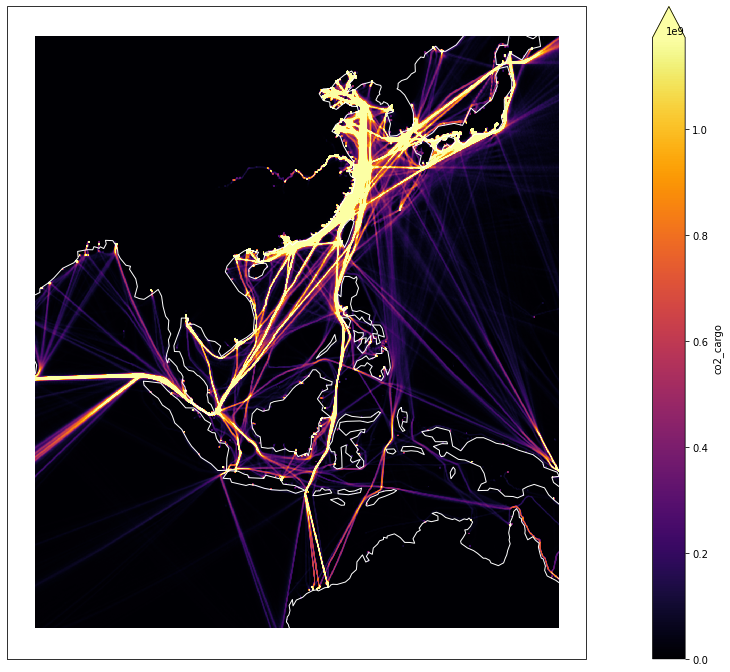

In [13]:
plot_emissions(ds_cargo_se_asia.sum('time').rolling(lat=5,lon=5).mean(),cmap='inferno')

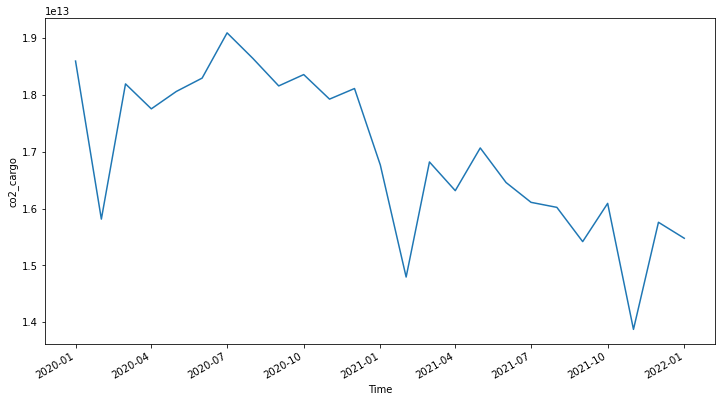

In [14]:
ds_cargo_se_asia.sum(['lon','lat']).plot(figsize=(12,6))

## Total CO2 emission in the world 

In [15]:
ds_total_co2_2021=ds.co2_total.sel(time=slice('2021-01-01','2022-01-01')).sum('time').compute()

In [16]:
co2_total=(ds_total_co2_2021.sum(['lon','lat']).data)/1e6/1e6
print(f'Total CO2 emissions from maritime vessel traffic in 2021 estimated to {co2_total:.1f} million tonnes')

Total CO2 emissions from maritime vessel traffic in 2021 estimated to 1000.8 million tonnes


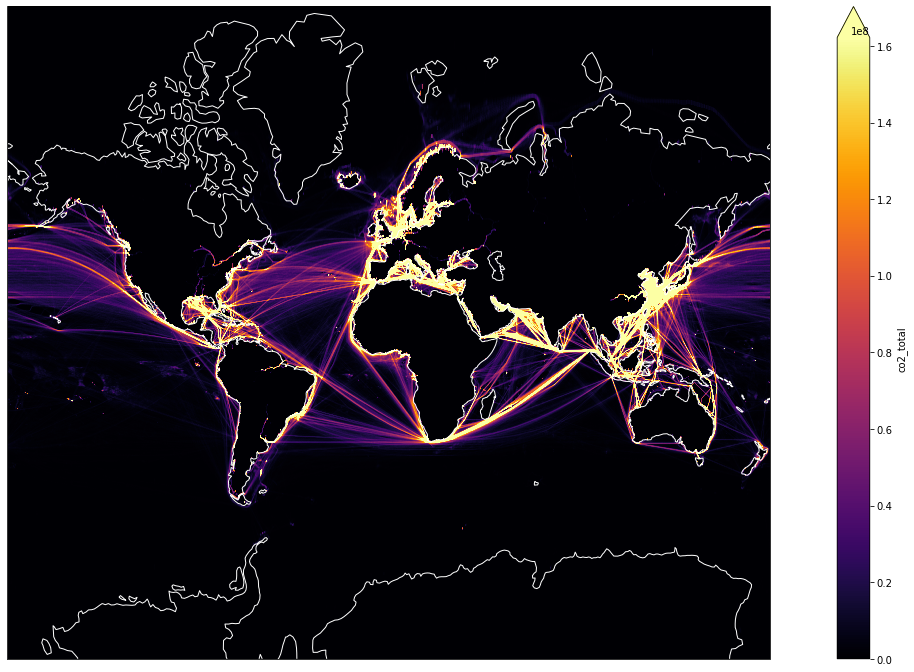

In [17]:
plot_emissions(ds_total_co2_2021.rolling(lat=11,lon=11).mean(),cmap='inferno')

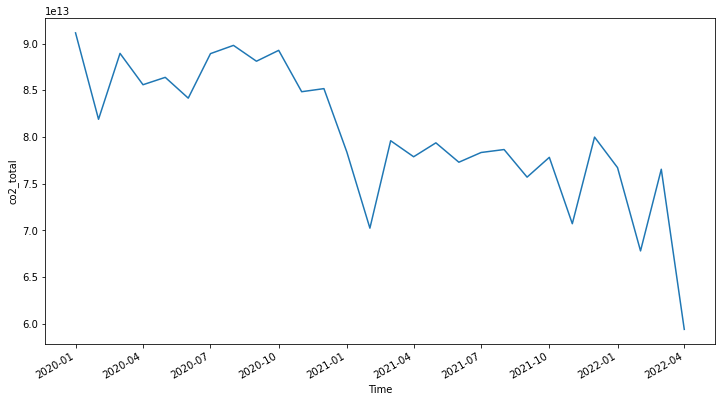

In [18]:
ds.co2_total.sum(['lon','lat']).plot(figsize=(12,6))

In [19]:
ds_total_co2_2020=ds.co2_total.sel(time=slice('2020-01-01','2021-01-01')).sum('time').compute()

In [20]:
co2_total_2020=(ds_total_co2_2020.sum(['lon','lat']).data)/1e6/1e6
print(f'Total CO2 emissions from maritime vessel traffic in 2020 estimated to {co2_total_2020:.1f} million tonnes')

Total CO2 emissions from maritime vessel traffic in 2020 estimated to 1122.7 million tonnes
